# The Project: Plotting NYC Subway Location Data

For a project I am working on I wanted to know the locations of all the subway entrances in NYC. After locating the right [data set](https://data.cityofnewyork.us/Transportation/Subway-Entrances/drex-xx56/data) from [NYC Open Data](https://opendata.cityofnewyork.us/) that contains latitude and longitude data on each subway I was disappointed to find that the Excel file looked like this:

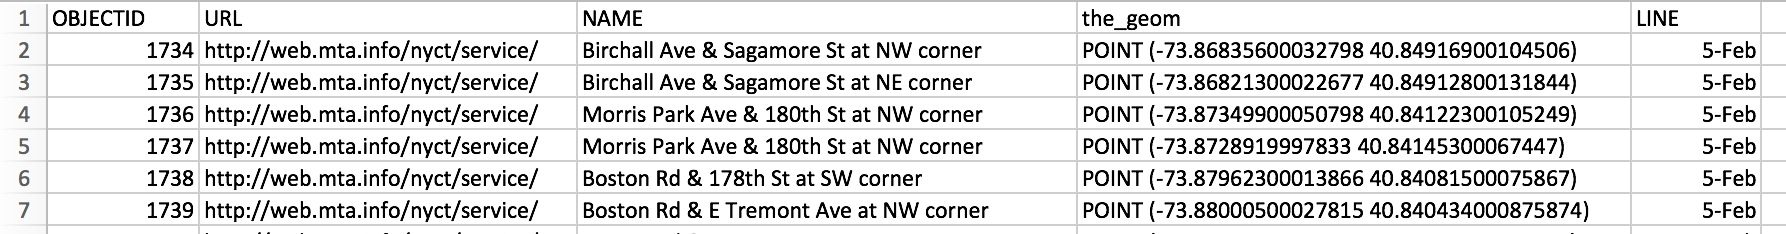

## The Challenge

**The Data I Have:** “the_geom” column has the latitude and longitude data I want but each entry is a string containing the word “Point (_longitude_ _latitude_)”. 

**The Data I Want:** I want to make a heat map with a point for each subway location but in order to do that I need to change the data in the “the_geom” column so that I have separate integer values for the latitude and longitude for each subway location.


## One Solution

Here are some steps you can take to make your data readable. Depending on your particular data set and your goals you might not need all of the steps below.

1. read your data file into a table
2. store the data from the column you want to manipulate in an array
3. manipulate the array by slicing each value in the array
4. add the newly formatted data back to your data Table
5. convert the table back into a data file like a .csv

## 1. Reading Your Data File Into a Table

The datascience library allows you to read your data file directly into a table! You can import the entire data science library by writing `from datascience import *`

Then you can create a table by writing `Table.read_table('filename')` 

 > If the program has trouble reading in the file, you can try adding the "encoding=" parameter, which helps your program to understand how the data in your file is encoded. You can read more about encoding [here](https://docs.python.org/3/howto/unicode.html).
> ex) `subways = Table.read_table('subway-entrances-nyc.csv', encoding='latin-1')`


Now lets see what that table looks like! Type `table_name.show()` to display the whole data table or `table_name.show(10)` to display the first 10 lines of the table.

In [2]:
from datascience import * #import the data science module

subways = Table.read_table('subway-entrances-nyc.csv') #read in your data table
subways.show(10) #display the first 10 lines of the table.

OBJECTID,URL,NAME,the_geom,LINE
1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),5-Feb
1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),5-Feb
1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),5-Feb
1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.8728919997833 40.84145300067447),5-Feb
1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,POINT (-73.87962300013866 40.84081500075867),5-Feb
1739,http://web.mta.info/nyct/service/,Boston Rd & E Tremont Ave at NW corner,POINT (-73.88000500027815 40.840434000875874),5-Feb
1740,http://web.mta.info/nyct/service/,Boston Rd & E Tremont Ave at NE corner,POINT (-73.87983300021861 40.84035400111976),5-Feb
1741,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SE corner,POINT (-73.8795549998336 40.84063900116436),5-Feb
1742,http://web.mta.info/nyct/service/,Boston Rd & 178th St at NW corner,POINT (-73.87939700013239 40.84107800066419),5-Feb
1743,http://web.mta.info/nyct/service/,Boston Rd & 174th St at SW corner,POINT (-73.88804799985908 40.83732500129732),5-Feb


## 2. Storing The Data From the Column You Want to Manipulate in an Array

I want to modify the "the_geom" column so I stored the data in an [array](https://www.inferentialthinking.com/chapters/05/1/arrays.html) called `subway_locations`. You can store the data from a column of a table in an array by writing `table_name[column_name]` or `table_name[column_index]`.

After assigning variables, I always like to print or display the variable just to quickly check that everything looks okay.

In [3]:
subway_locations = subways['the_geom'] #table_name[column_name]
subway_locations

array(['POINT (-73.86835600032798 40.84916900104506)',
       'POINT (-73.86821300022677 40.84912800131844)',
       'POINT (-73.87349900050798 40.84122300105249)', ...,
       'POINT (-73.94761889814153 40.783916088309326)',
       'POINT (-73.94772938539093 40.78292438898596)',
       'POINT (-73.94823792460468 40.78296690878563)'],
      dtype='<U45')

## 3. Manipulating the Array by Slicing Each Value in the Array

You can slice a string in python by using the following notation, `string[a:b]` where `a` is an integer representing the starting index and `b` represents one plus the ending index of the slice of the string you want to acquire.  You can read more about slicing strings [here](https://www.digitalocean.com/community/tutorials/how-to-index-and-slice-strings-in-python-3).

> ex) if you have `phrase = 'Julia goes skiing'` and you want to capture the word "goes" you notice that "goes" starts at the 7th character of the phrase (at index 6) and ends at the 10th character of the phrase (at index 9). `goes = phrase[6:10]`

Lets start by getting rid of "POINT (" and ")" in each entry of the subway_locations array. The first 7 characters of each entry of the subway_locations array are identical and the last character of each entry is identical. Since we want to cut off the first 7 characters and last character of every single entry of the subway_locations array we can slice every entry from [7:-1].

> [7:-1] works for every entry BUT [7:43] wouldn't work because not every entry is the same length

> ex) 'POINT (-73.86835600032798 40.84916900104506)' and 'POINT (-73.22 40.88) both start with "POINT (" and end with ")" but they arent the same lenght so [7:43] would throw an error on the second example.


Using [list comprehension](http://www.pythonforbeginners.com/basics/list-comprehensions-in-python) I sliced every element in subway_locations and stored it in a new array called 
creating a new array called "points"

In [11]:
points = [location[7:-1] for location in subway_locations]
points #always a good idea to check that your variable looks as expected

['-73.86835600032798 40.84916900104506',
 '-73.86821300022677 40.84912800131844',
 '-73.87349900050798 40.84122300105249',
 '-73.8728919997833 40.84145300067447',
 '-73.87962300013866 40.84081500075867',
 '-73.88000500027815 40.840434000875874',
 '-73.87983300021861 40.84035400111976',
 '-73.8795549998336 40.84063900116436',
 '-73.87939700013239 40.84107800066419',
 '-73.88804799985908 40.83732500129732',
 '-73.88775499967073 40.83759900080287',
 '-73.8920200000541 40.82990300129103',
 '-73.89201499957316 40.83036900118696',
 '-73.8928969996593 40.824356000986995',
 '-73.89311400018327 40.82417700086825',
 '-73.89272399968436 40.82435800046701',
 '-73.89650800005289 40.82240000099551',
 '-73.89671899954544 40.822447000685614',
 '-73.89668100059053 40.82209500126821',
 '-73.90195799960925 40.81958300055107',
 '-73.90166599969895 40.81988700097359',
 '-73.90794199971145 40.816201000889976',
 '-73.90783599990867 40.81634900118909',
 '-73.90789300002874 40.816589001345',
 '-73.907378999512

### Slicing the points array into latitude and longitude values

Now I want to split the array entries into a seperate latitude and longitude integer value. Rather than counting specific decimal places (as they might not be the same for each entry) you can generalize the process by looking for patterns in your entries. I noticed that there is a space character “ “ separating each latitude and longitude value. I can use this space character to split up my entry because everything that comes before the index of the space character is a longitude and everything that comes after the index of the space is a latitude. I can search each line until i find a space character and then slice every entry into two values using the index of the space character.

After slicing the entries into a latitude string and longitude string and then storing the values in two seperate arrays I can convert the two different strings of numbers into integers.

In [7]:
#cycle through entries in the points array
#then cycle through each index position in an entry in points
#if the index is a space then append the value to an array called cut_off_val
cut_off_val = []
for values in points:
    for count in range(len(values)): 
        if values[count] == ' ':
            cut_off_val.append(count) 
            
#splitting up the values in the points array into a longitude and latitude value using string slicing
#storing sliced string in an array using list comprehension
#convert every entry from a string into an integer
longitude = [float(points[count][:cut_off_val[count]]) for count in range(len(points))]
latitude = [float(points[count][cut_off_val[count]+1:]) for count in range(len(points))]

### Checking My Work

I printed the first value in the longitude and latitude array to check that my program stored the correct numbers. I then printed the literal type to make sure that my values are now floats instead of strings.

In [9]:
#checking that the latitude and longtiude arrays contain points that look like integers
print(latitude[0])
print(longitude[0])

#check that the latitude and longitude arrays contains integers
print(type(latitude[0]))
print(type(longitude[0]))

40.84916900104506
-73.86835600032798
<class 'float'>
<class 'float'>


## 4.  Adding the Newly Formatted Data back to Your Data Table

In [10]:
subways = subways.with_column('Lat', latitude, 'Lon', longitude)
subways.show(10)

OBJECTID,URL,NAME,the_geom,LINE,Lat,Lon
1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),5-Feb,40.8492,-73.8684
1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),5-Feb,40.8491,-73.8682
1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),5-Feb,40.8412,-73.8735
1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.8728919997833 40.84145300067447),5-Feb,40.8415,-73.8729
1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,POINT (-73.87962300013866 40.84081500075867),5-Feb,40.8408,-73.8796
1739,http://web.mta.info/nyct/service/,Boston Rd & E Tremont Ave at NW corner,POINT (-73.88000500027815 40.840434000875874),5-Feb,40.8404,-73.88
1740,http://web.mta.info/nyct/service/,Boston Rd & E Tremont Ave at NE corner,POINT (-73.87983300021861 40.84035400111976),5-Feb,40.8404,-73.8798
1741,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SE corner,POINT (-73.8795549998336 40.84063900116436),5-Feb,40.8406,-73.8796
1742,http://web.mta.info/nyct/service/,Boston Rd & 178th St at NW corner,POINT (-73.87939700013239 40.84107800066419),5-Feb,40.8411,-73.8794
1743,http://web.mta.info/nyct/service/,Boston Rd & 174th St at SW corner,POINT (-73.88804799985908 40.83732500129732),5-Feb,40.8373,-73.888


## 5. Converting the Table Back into a Data File

In [12]:
subways.to_csv('subways_export.csv') #table_name.to_csv('new_file_name.csv')

# Conclusion

When you encounter data that is not stored in the format that you need it in don't panic because you can use methods such as string slicing, list comprehension, and type conversion to store the data in a way that you prefer!

### Tips
- try to write code in a very general way so that your program works for all your data points
- look for patterns in your data entries that make it possible to break up your data in a consistent way
- use lots of print statements to check that your output is what you expected
- always check the type of the data you have and compare it to the type of data you want
    - *note: even if a column looks like it contains numbers, each entry could be a string instead of an integer*
    
    
### Whats Next?
*link to my other guides*

### What was I able to do after making data readable?

Once I had seperate latitude and longitude integer values for each subway location I was able to make a heat map of each subway entrance in NYC. You can read more about this step here! *insert link*

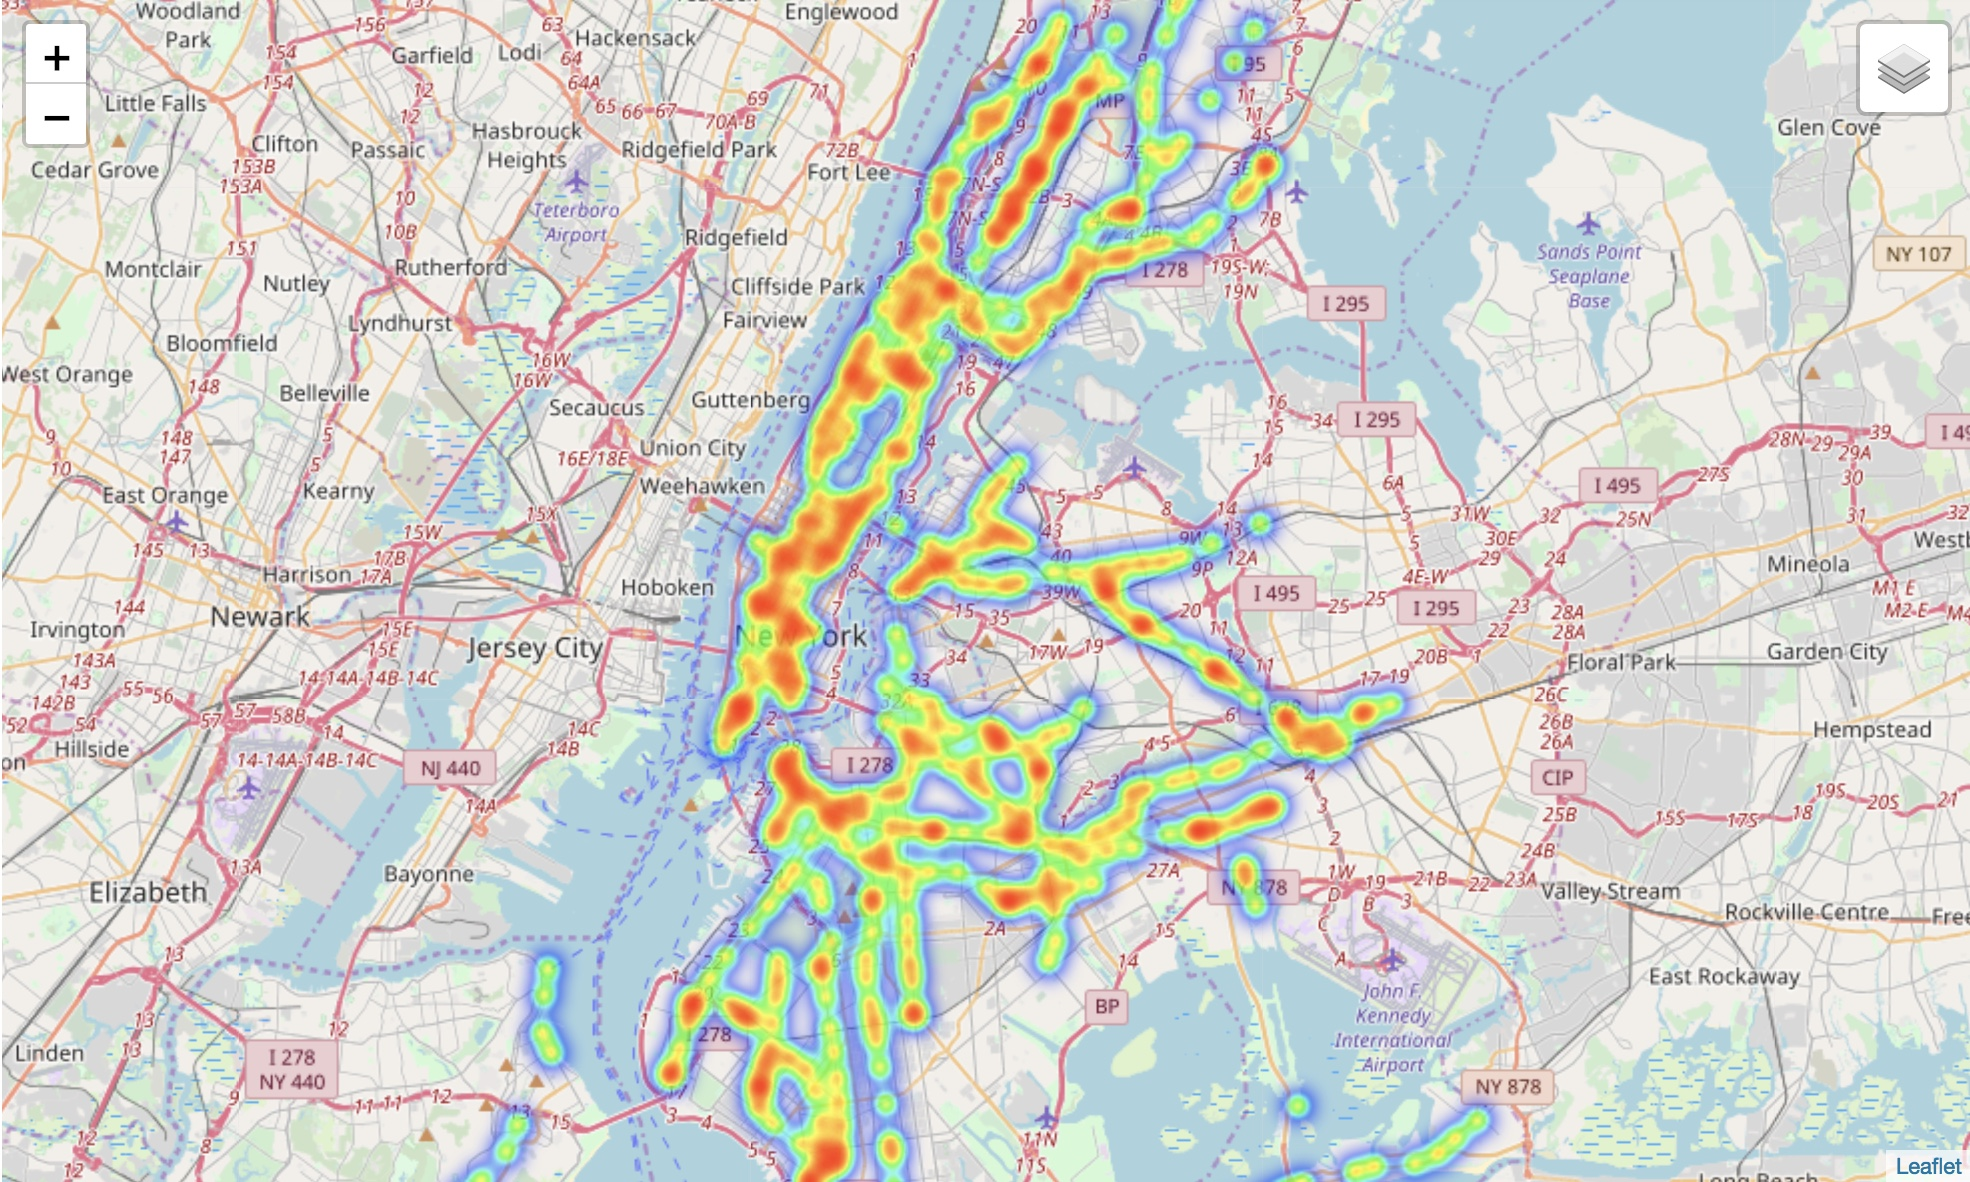